In [1]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction to Time-Series Analysis

- a __time-series__ data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals. The frequency of recorded data points may be hourly, weekly, monthly, quarterly or annually.


- __time-Series Forecasting__ is the process of usin a statistical model to predict future values of a time-series based on past results.


- a time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.


- applications of time series are used in statistics, finance or business applications. A very common example of time series data is the daily closing value of the stock index like NASDAQ or Dow Jones. Other common applications of time series are sales and demand forecasting, weather forecasting, econometrics, signal processing, pattern recognition and earthquake prediction.

## components of a time-series

- __Trend__: the trend shows a general direction of the time series data over a long period of time. A trend can be increasing (upward), decreasing (downward), or horizontal (stationary).


- __Seasonality__: the seasonality component exhibits a trend that repeats with respect of timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.


- __Cyclical Component__: these are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.


- __Irregular Variation__: these are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic and may or may not be random.


- __ETS Decomposition__: it's used to separate different components of a time series. ETS stands for Error, Trend and Seasonality.

## types of data

As stated above, the time series analysis is the statistical analysis of the time series data. A time series data means that data is recorded at different time periods or intervals. The time series data may be of three types:

- __time series data__: the observations of the values of a variable recorded at different points in time is called time series data.


- __cross sectional data__: it's the data of one or more variables recorded at the same point in time.


- __pooled data__: it's the combination of time series data and cross sectional data.

## time series terminology

- __Dependence__: it refers to the association of two observations of the same variable at prior time periods.


- __Stationarity__: it shows the mean value of the series that remains constant over the time period. If past effects accumulate and the value increase towards infinity then stationarity is not met.


- __Differencing__: it's used to make the series stationary and to control the auto-correlations. There may be some cases in time series analysis where we do not require differencing and over-differenced series can produce wrong estimates.


- __Specification__: it may involve the testing of the linear or non-linear relationships of dependent variables by using time series models such as ARIMA models.


- __Exponential Smoothing__: exponential smoothing in time series analysis predicts the one next period value based on the past and current value. It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other. The exponential smoothing method is used to predict the short term prediction.


- __Curve fitting__: curve fitting regression in time series analysis is used when data is in a non-linear relationship.


- __ARIMA__: ARIMA stands for Auto Regressive Integrated Moving Average.

# time series analysis

In [2]:
# upload the dataset

df = pd.read_csv('./raw_data/AirPassengers.csv')

# rename the columns

df.columns = ['date', 'passengers']


df.head()

,date,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## visualize the time series

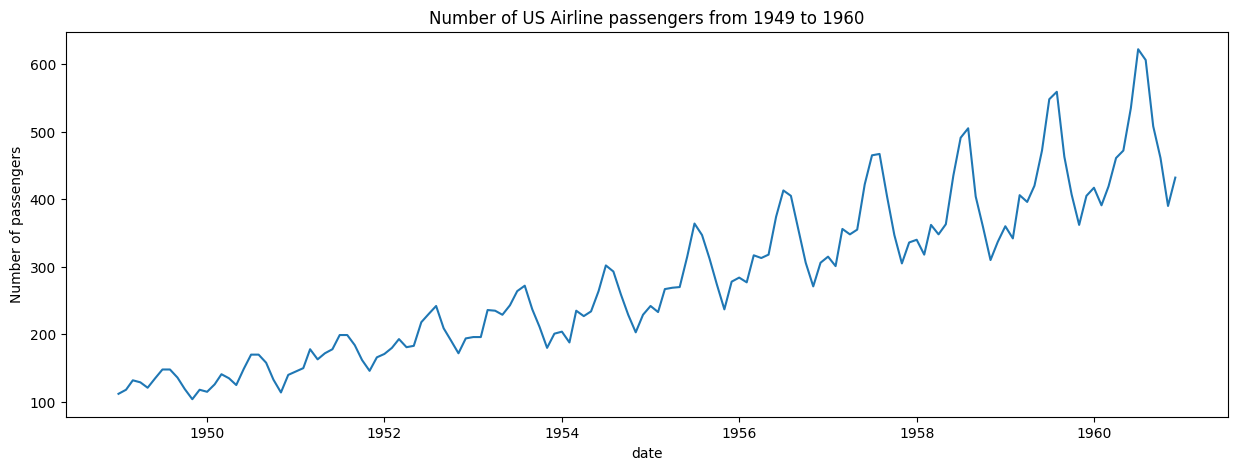

In [3]:
# create df_yearly to make x axis simpler
df_yearly = df.copy()
df_yearly['date'] = pd.to_datetime(df_yearly['date'])


plt.figure(figsize=(15,5))
plt.plot(df_yearly['date'], df_yearly['passengers'])
plt.title('Number of US Airline passengers from 1949 to 1960')
plt.xlabel('date')
plt.ylabel('Number of passengers')
plt.show()

__Comments__:

- all values are positive and reveal a tendency of growth;


- the time series follows a certain repetitive pattern every year.

## Patterns in a time series

Any time series visualization may consist of the following components: __Base level + Trend + Seasonality + Error__

### Trend

- a __trend__ is observed when there is an increasing or decreasing slope observed in the time series.

### Seasonality

- a __seasonality__ is observed when there is an distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.


However, it's not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.

### Cyclic behaviour

- it happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. We should not confuse 'cyclic' effect with 'seasonal' effect.


- if the patterns are not fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

## additive and multiplicative time series

- we may have different combinations of trends and seasonality. Depending on the nature of the trends and seasonality, a time series can be modeled as an additive or multiplicative time series. Each observation in the series can be expressed as either a sum or a product of the components.


__Additive time series__:

Value = Base level + Trend + Seasonality + Error




__Multiplicative time series__:

Value = Base level x Trend x Seasonality x Error

## decomposition of a time series

- decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.


- the seasonal_decompose in statsmodels implements this conveniently.

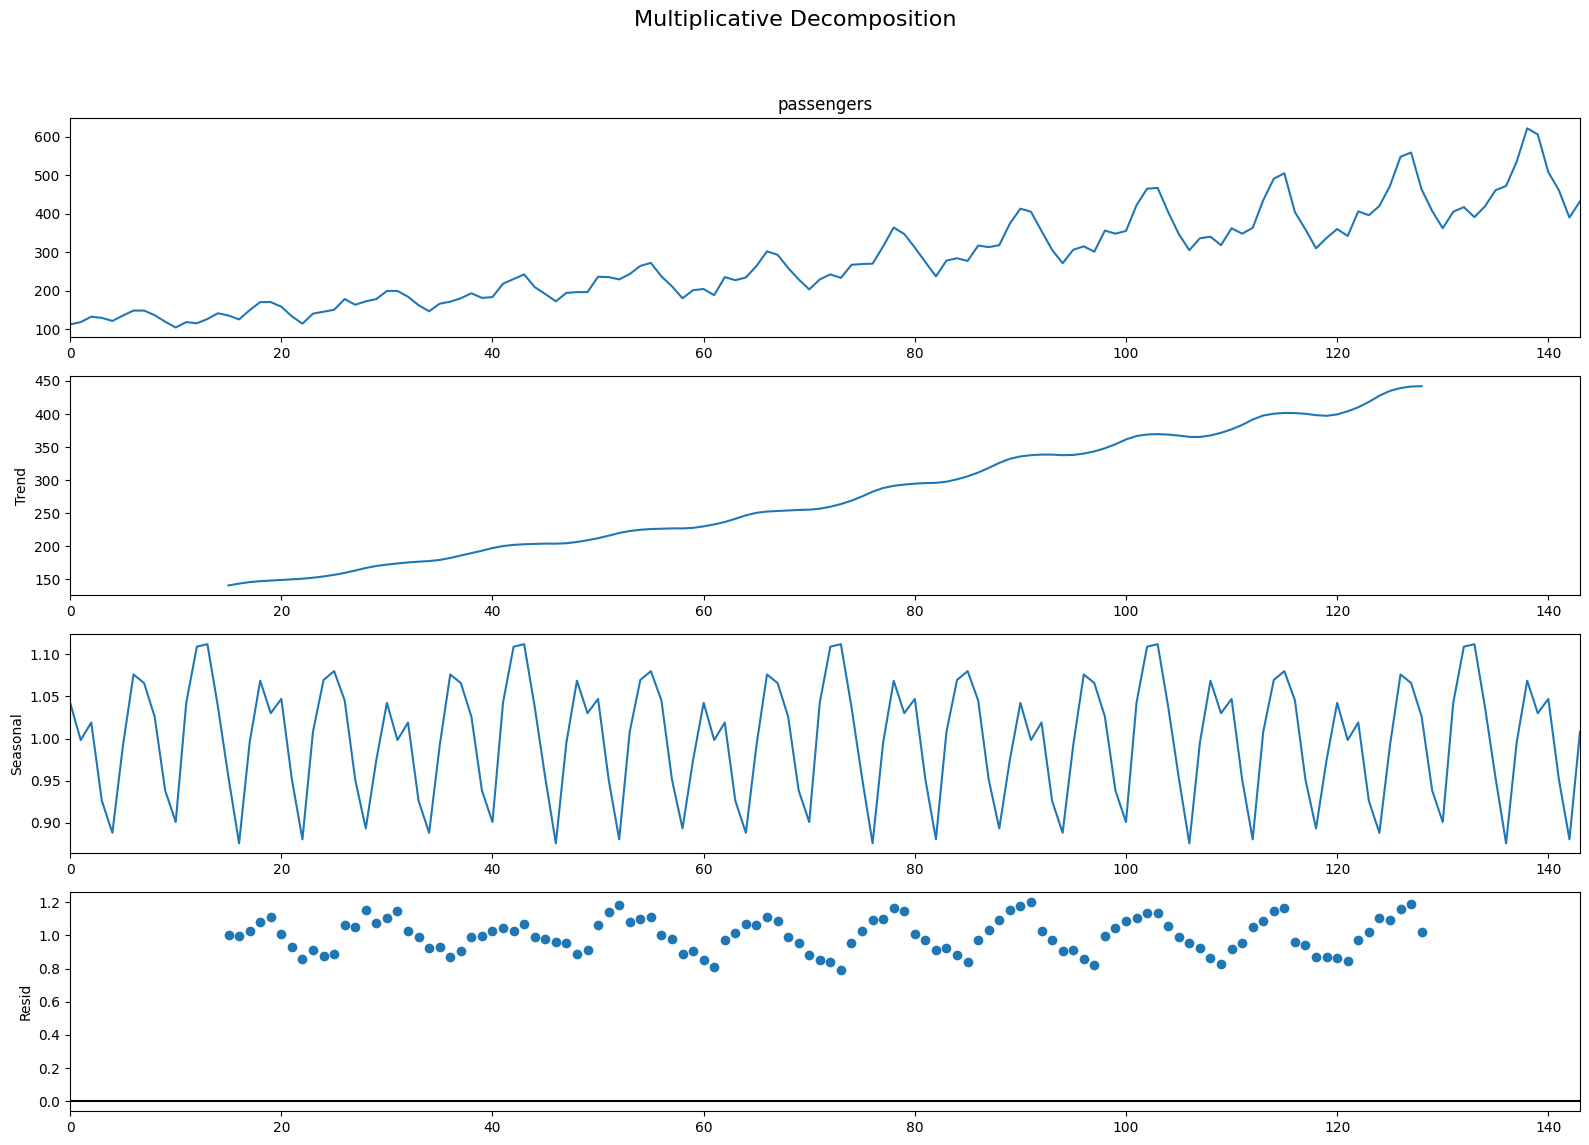

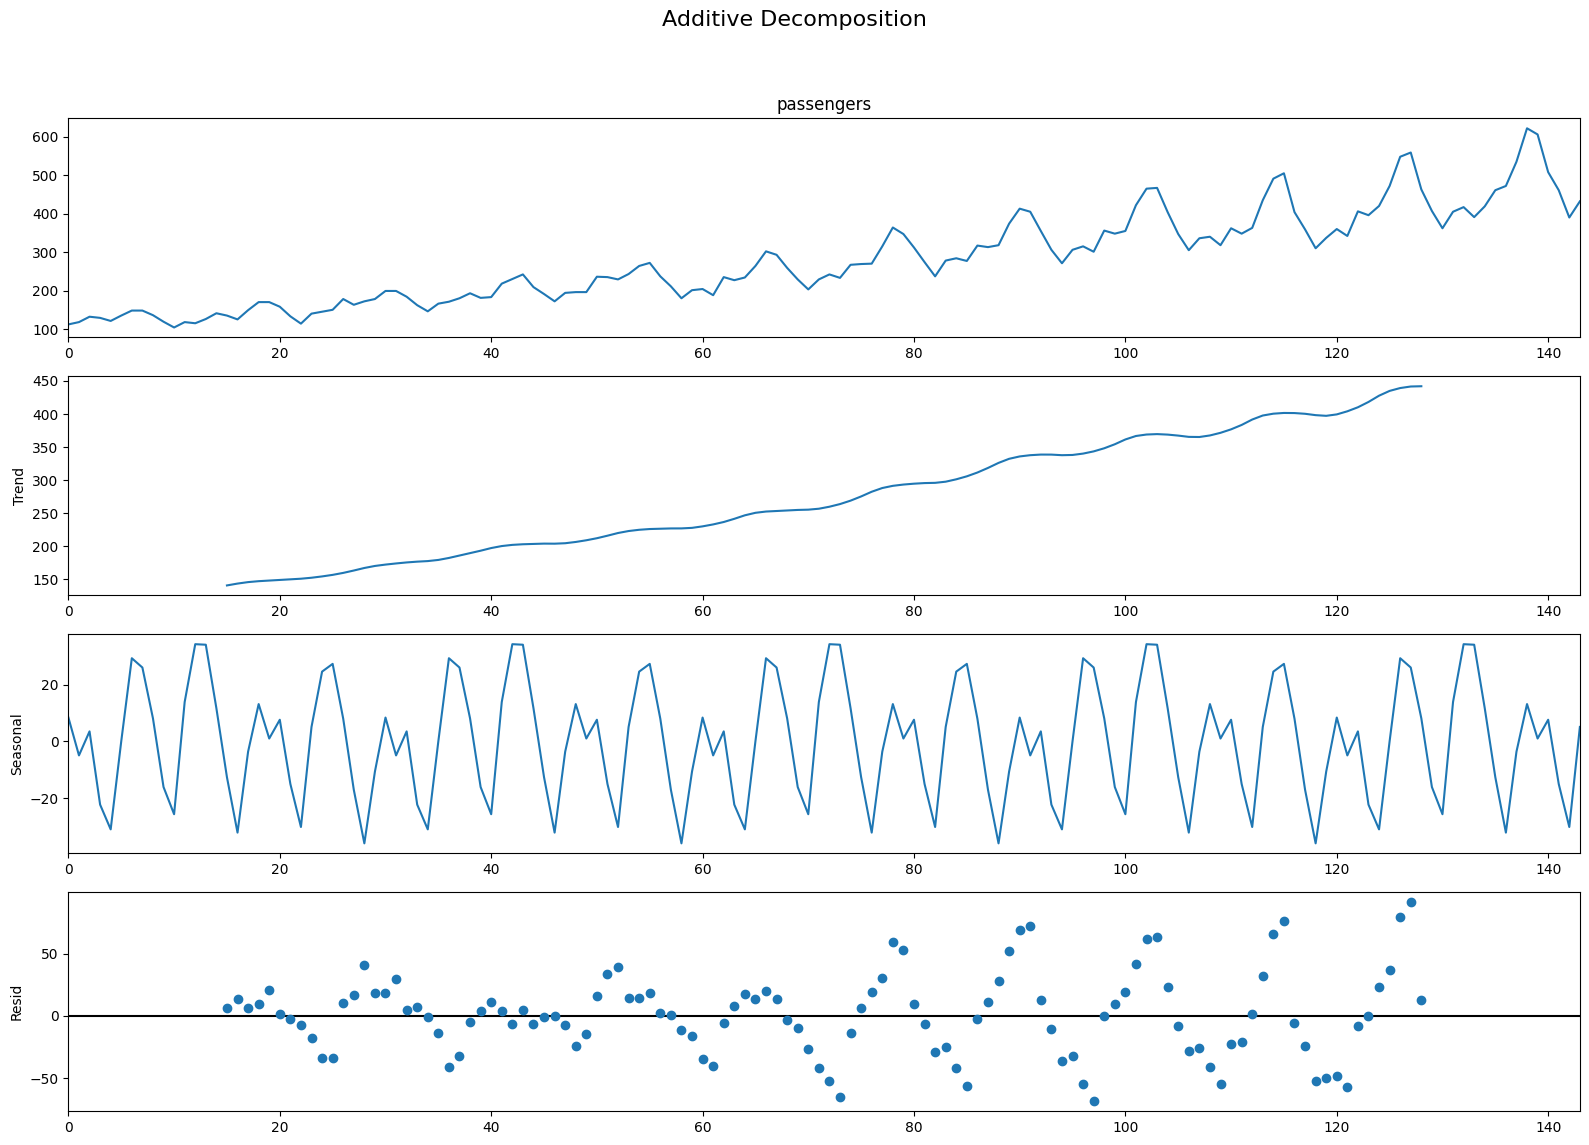

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

#multiplicative decomposition
multiplicative_decomposition = seasonal_decompose(df['passengers'], model='multiplicative', period=30)

#additive decomposition
additive_decomposition = seasonal_decompose(df['passengers'], model='additive', period=30)

#plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.show()

- both decompositions have some pattern left over at the residuals. 


- the residuals of the multiplicative decomposition have a more random pattern. So, ideally, multiplicative decomposition should be preferred for this particular series.

## stationary and non-stationary time series

-  __stationary__ is a property of time series. A __stationary__ series is one where the values of the series is not a function of time. So, the values are independent of time.


- hence the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values.


- a stationary time series is independent of seasonal effects as well.


- we ca convert any non-stationary time series into a stationary one by applying a suitable transformation. Mostly statistical forecasting methods are design to work on a stationary time series. The first step in a forecasting process is typically to do some transformation to convert a non-stationary series to stationary

## how to make a time series stationary?

- we can apply some sort of transformation to make the time series stationary. These transformations may include:


    - differencing the series (once or more)
    - apply the log transformation
    - take the nth root of the series
    - combination of the above
    

- the most commonly used and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

### introduction to differencing

- if Y_t is the value at time t, then the first difference is Y = Y_t - Y_t-1. In simpler terms, differencing the series is nothing but __subtracting the next value by the current value__.


- if the first difference doesn't make a series stationary, we can go for the second differencing and son on.


- for example, consider the following series: [1, 5, 2, 12, 20]


- first differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]


- second differencing gives: [-3-4, 10-3, 8-10] = [-7, 7, -2]

### reasons to convert a non-stationary series into stationary one before forecasting

- forecasting a stationary series is relatively easy and the forecasts are more reliable.


- an important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.


- linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors (lag of the series) in the forecasting models nearly independent. 

## How to test for stationarity?

- the stationarity of a series can be checked by looking at the plot of the series.


- another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.


- there are several quantitative methods we can use to determine if a given series is stationary or not. This can be done using statistical tests called __Unit Root Tests__. This test checks if a time series is non-stationary and possess a unit root.


- there are multiples implementations of Unit Root, like:
    - Augmented Dickey Fuller test (ADF Test)
    - Kwiatkowski-Phillips-Schmidt-Shin (KPSS test) (trend stationary)
    - Philips Perron test (PP Test)

### Augmented Dickey Fuller test (ADF Test)

__ADF Test__ is the most commonly used test to detect stationarity. We assume that the null hypothesis is the time series possesses a unit root and is non-stationary. Then, we collect evidence to support or reject the null hypothesis. So, if we find that the p-value in ADF test is less than the significant level (0.05), we reject the null hypothesis.

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS test) (trend stationary)

On the other hand, the KPSS test is used to test for trend stationarity. The null hypothesis and the p-value interpretation is just the opposite of ADH test.

### Philips Perron test (PP Test)

The Philips Perron or PP test is a unit root test. It's used in the time series analysis to test the null hypothesis that a time series is integrated of order 1. It's built on the ADF test discussed above.

## Difference between white noise and a stationary series

Like a stationary series, the __white noise__ is also not a function of time. So, its mean and variance does not change over time. But the difference is that, the white noise is completely random with a mean of 0. In white noise there is no pattern.


Mathematically, a sequence of completely random numbers with zero mean is a white noise.

<AxesSubplot:title={'center':'Random White Noise'}>

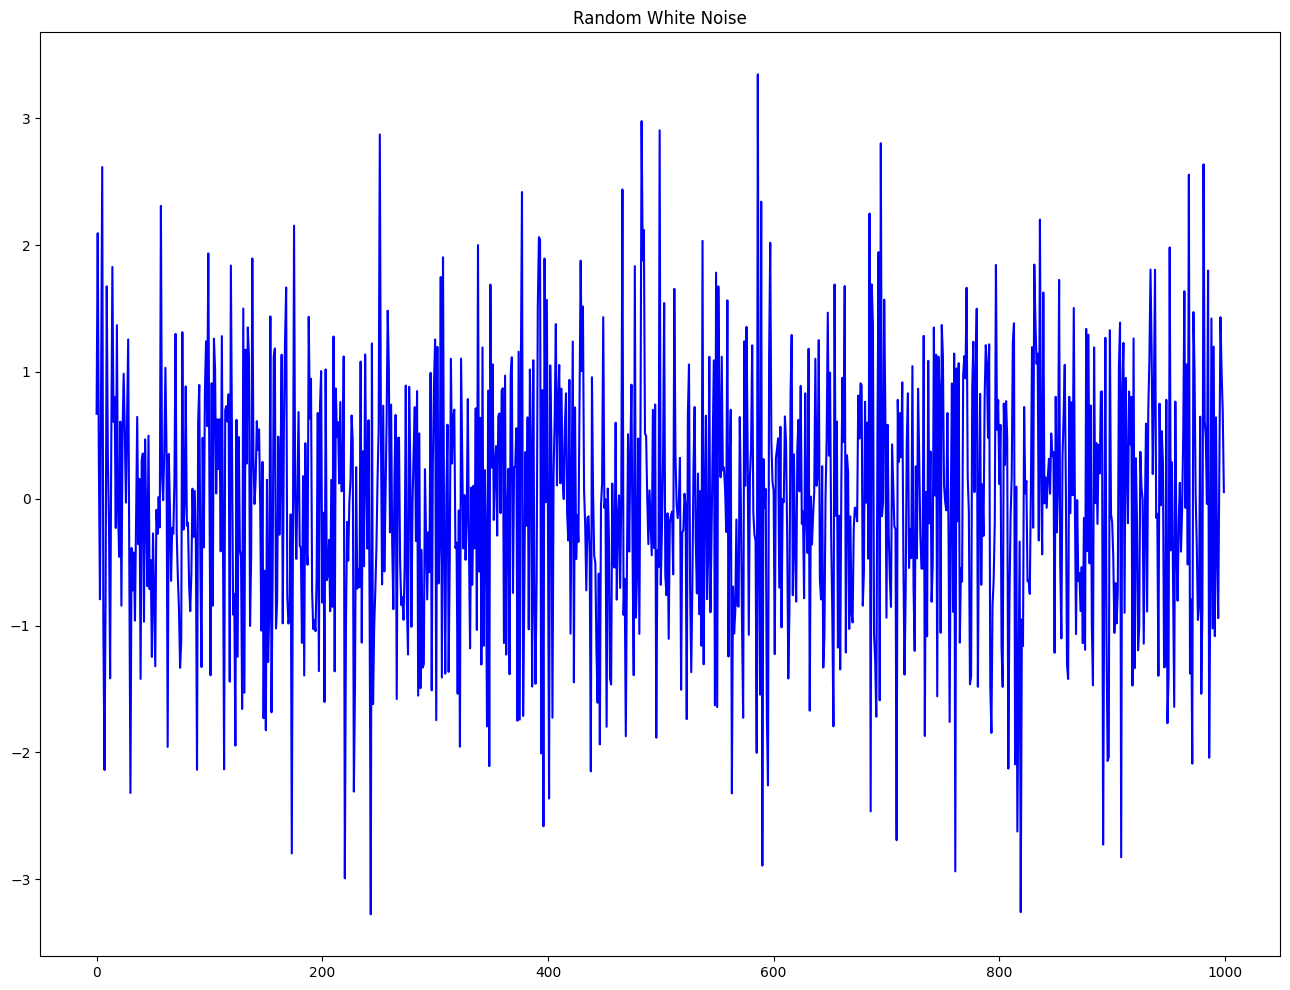

In [5]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')

## Detrend a time series

- detrending a time series means to remove the trend component from the time series. There are multiple approaches of doing this as listed below:
    - subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, we may want to use quadratic terms (x^2) in the model;
    - we subtract the trend component obtained from time series decomposition;
    - subtract the mean;
    - apply a filter like Baxter-King filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

### subtract the line of best fit

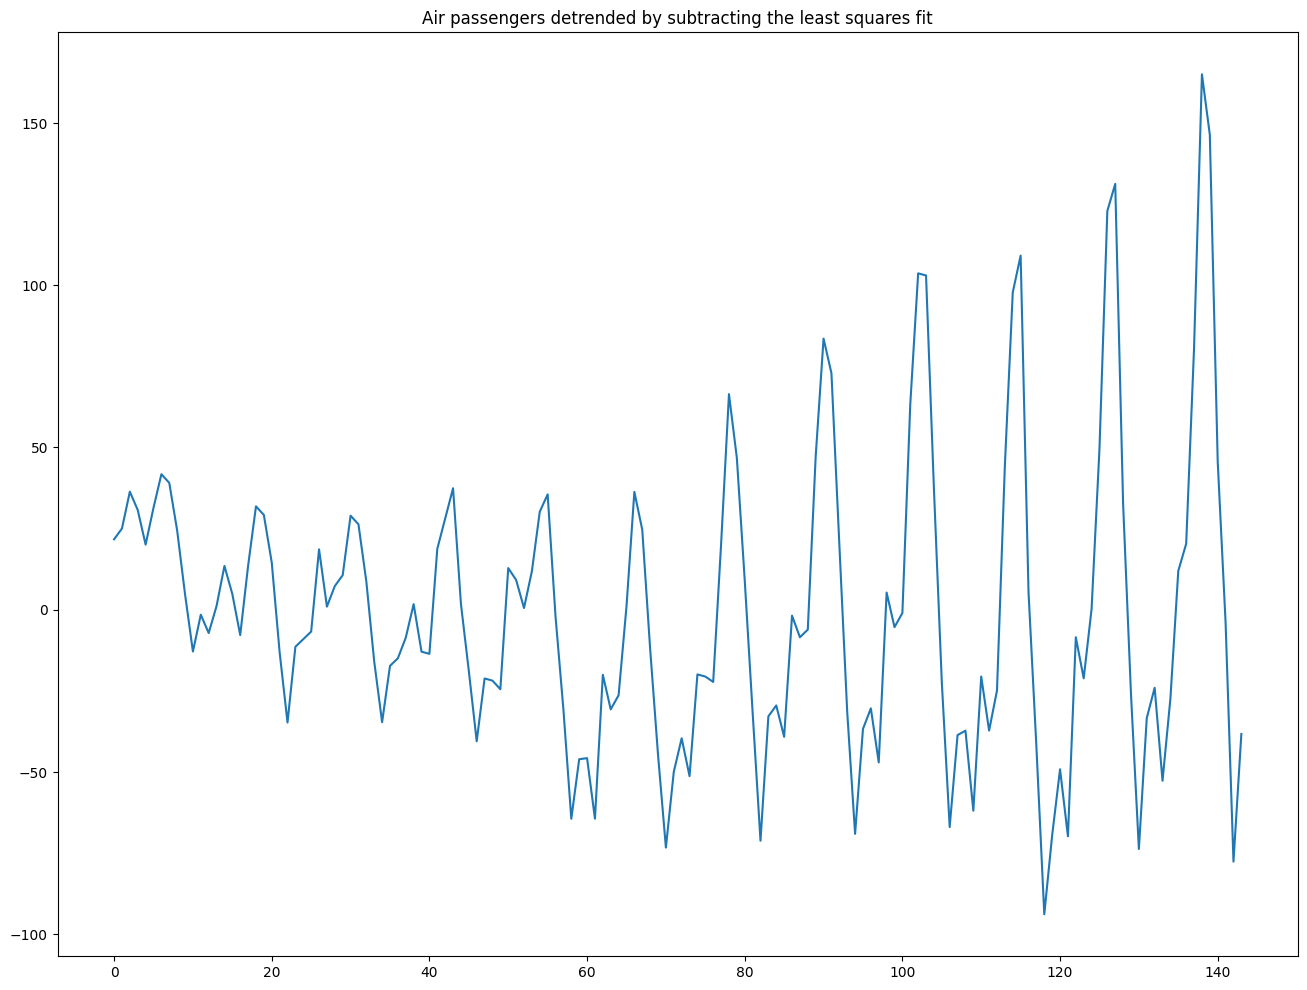

In [7]:
from scipy import signal

detrended = signal.detrend(df['passengers'].values)
plt.plot(detrended)
plt.title('Air passengers detrended by subtracting the least squares fit')
plt.show()

### subtract the trend component

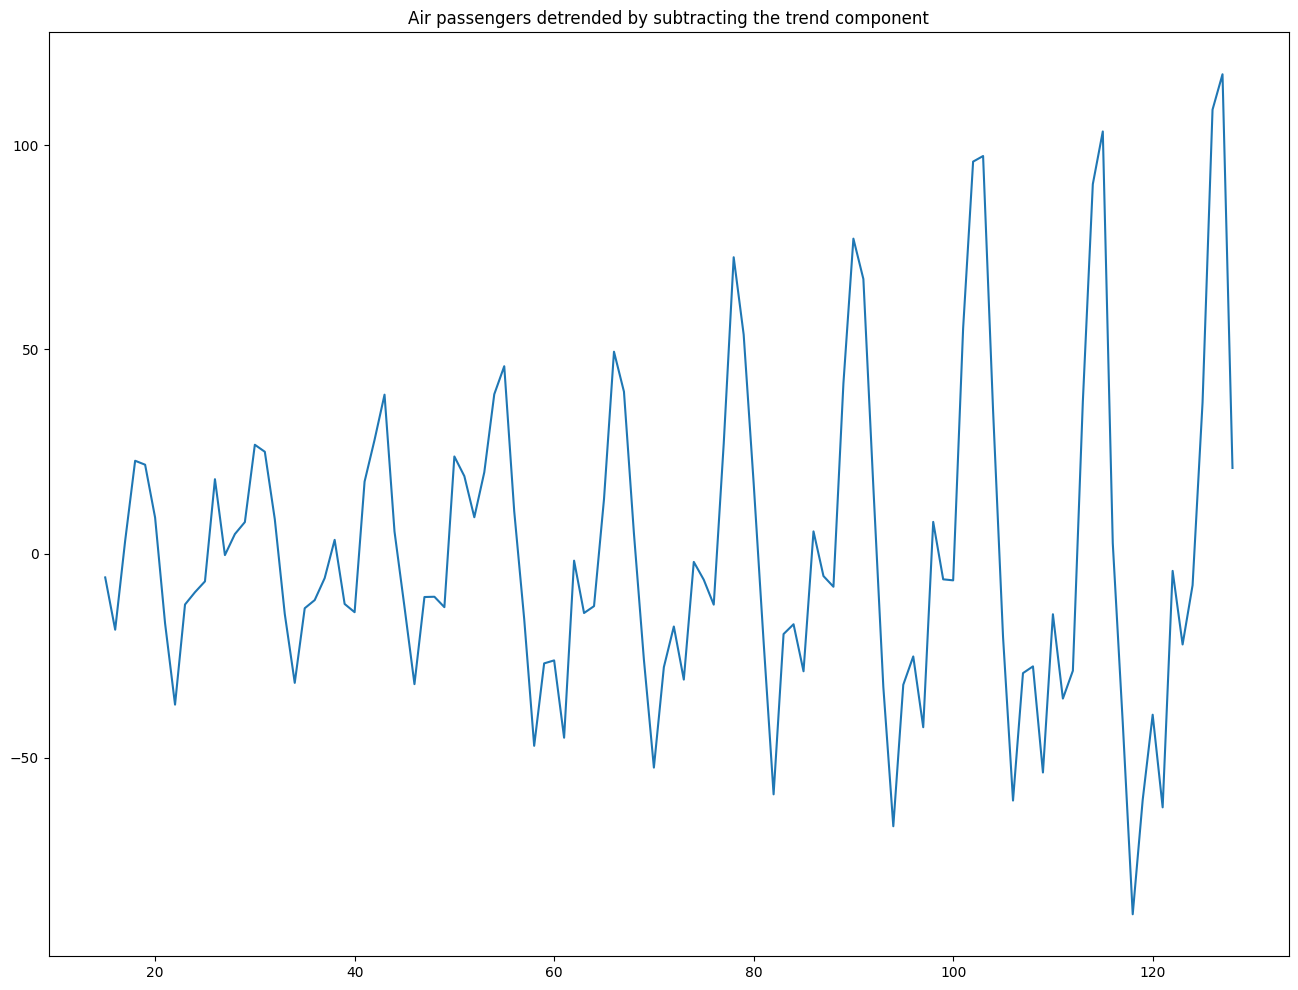

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['passengers'], model='multiplicative', period=30)
detrended = df['passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air passengers detrended by subtracting the trend component')
plt.show()

## Deseasonalize a time series

There are multiple approaches to deseasonalize a time series:

- take a moving average with length as the seasonal window. This will smoothen in series in the process.


- seasonal difference the series (subtract the value of previous season from the current value)


- divide the series by the seasonal index obtained from STL decomposition.


If dividing by the seasonal index does not work well, we'll take a lo of the series and then do the deseasonalizing. We will later restore to the original scale by taking an exponential.

### subtracting the trend component

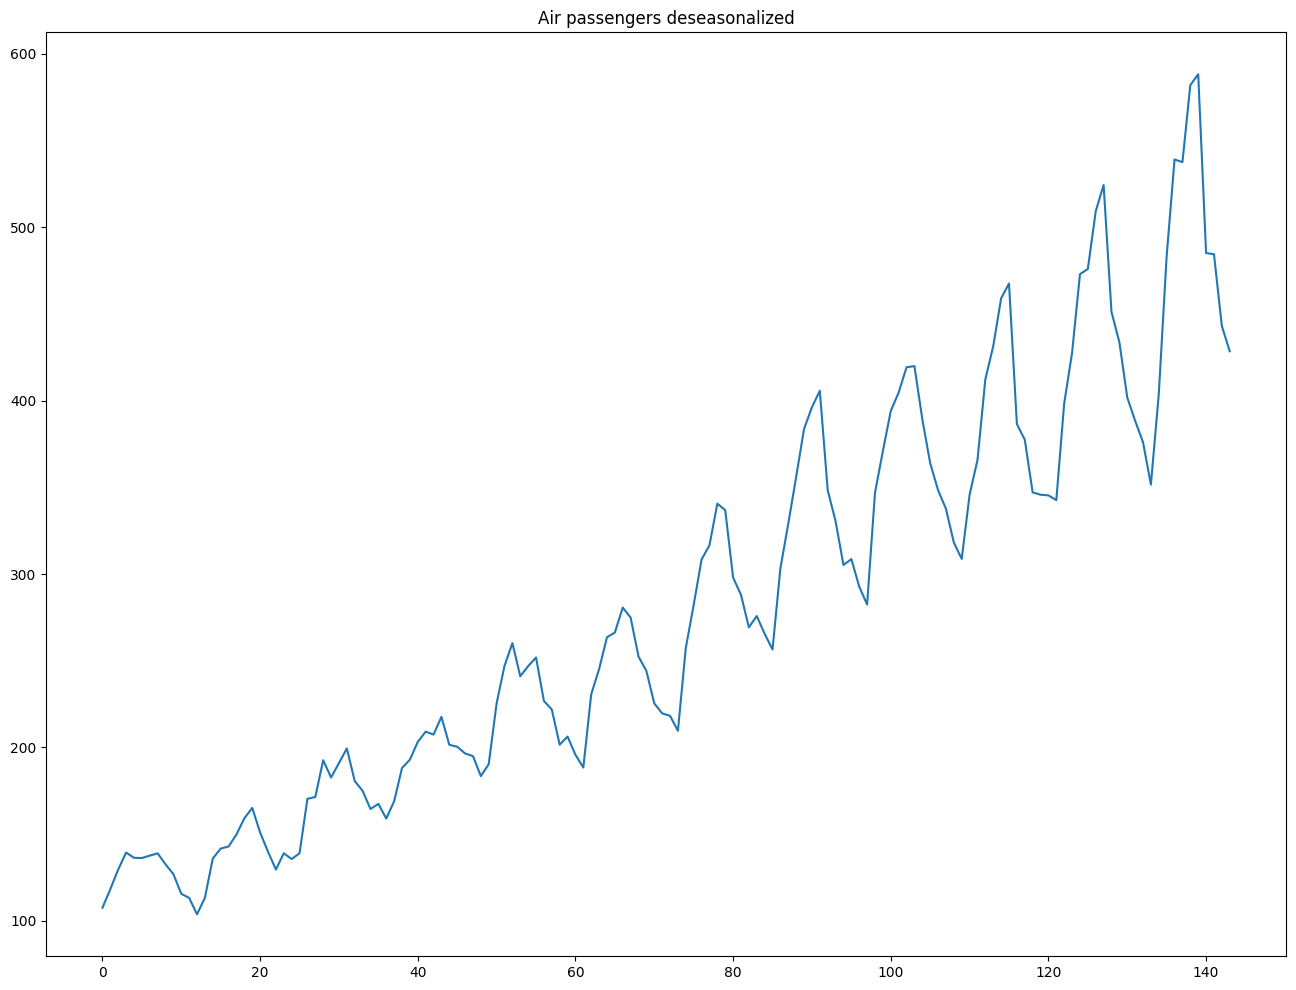

In [10]:
# time series decomposition
result_mul = seasonal_decompose(df['passengers'], model='multiplicative', period=30)

# deseasonalize
deseasonalize = df['passengers'].values / result_mul.seasonal

# plot
plt.plot(deseasonalize)
plt.title('Air passengers deseasonalized')
plt.show()